In [1]:
!pip install  matplotlib -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from urllib.parse import urlparse
import datetime as dt
import pickle
import re
from datetime import datetime
import requests

In [3]:
response=requests.get("https://9b2a-2001-7c0-2900-8050-5652-ff-fe00-18.eu.ngrok.io/source/?total=0")
data = response.json()
data=pd.DataFrame(data)

In [5]:
#filtering the feeds
data=data.loc[data["RSS"]!="https://doonhorizon.in/feed/"]
data=data.loc[data["RSS"]!="https://jantaserishta.com/feed"]


In [6]:
data["Total"]=data["Total_1"]+data["Total_0"]
data

,RSS,Total_1,Total_0,Avg_Hit_Rate,Last_Updated,Total
0,朝日新聞デジタル,1,0,100.000000,1.673910e+12,1
1,अमर उजाला,1,0,100.000000,1.673996e+12,1
2,www.electrive.com,1,0,100.000000,1.674169e+12,1
3,wweek.com,1,0,100.000000,1.674083e+12,1
4,wpgtalkradio.com,1,0,100.000000,1.674342e+12,1
...,...,...,...,...,...,...
3825,https://wrestlingheadlines.com/feed/,3,2907,0.103093,1.674342e+12,2910
3826,https://www.pcgamesn.com/feed,1,990,0.100908,1.674256e+12,991
3827,https://www.actionforex.com/feed/,1,1007,0.099206,1.674342e+12,1008
3828,https://www.e360hubs.com/feeds/posts/default?a...,1,1236,0.080841,1.674342e+12,1237


In [7]:
print(data["Total"].sum())
print(data["Total_1"].sum())

1511992
92137


In [8]:
total_articles1=data.loc[data["Total"]>10]
total_articles1["Avg hit rate >10"]=total_articles1["Avg_Hit_Rate"]>10

<ipython-input-8-98433baa76ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_articles1["Avg hit rate >10"]=total_articles1["Avg_Hit_Rate"]>10


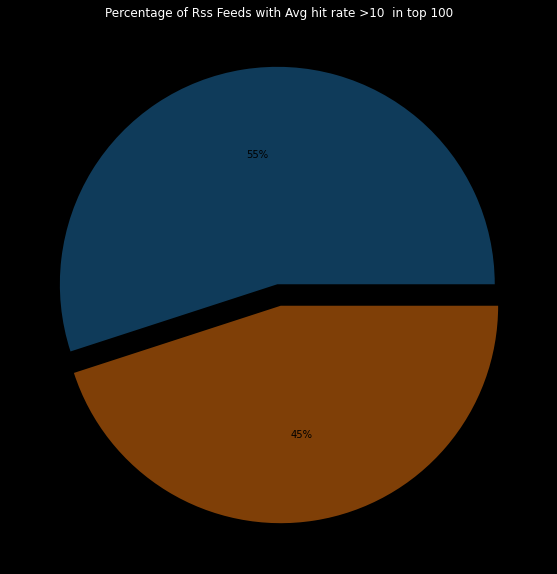

In [9]:
import matplotlib.pyplot as plt
explode = (0.05, 0.05)
total_articles1=total_articles1.sort_values(by=["Total_1","Avg_Hit_Rate"],ascending=False).iloc[0:100,]
# total_articles1.groupby(['Avg hit rate >10']).count().plot(kind='pie',y='source', autopct='%1.0f%%',explode=explode,title=" Percentage of Rss Articles with Avg hit rate >10  in top 100",
#                         figsize=(10,10),wedgeprops={'alpha':0.3})
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('black')
ax.set_title('Percentage of Rss Feeds with Avg hit rate >10  in top 100',color="white")
plt.pie(total_articles1['Avg hit rate >10'].value_counts(), wedgeprops={'alpha':0.5},autopct='%1.0f%%',explode=explode)
plt.show()

In [32]:
total_articles1

,RSS,Total_1,Total_0,Avg_Hit_Rate,Last_Updated,Total,Avg hit rate >10
2680,,17533,308088,5.384481,1.671322e+12,325621,False
1699,https://www.jornada.com.mx/feeds/rss,2220,9154,19.518199,1.674342e+12,11374,True
1594,https://cycling.org.au/Home/rss/13516,1409,4510,23.804697,1.674342e+12,5919,True
1959,https://mediaindonesia.com/feed,1241,9013,12.102594,1.674342e+12,10254,True
1891,https://www.sentinelassam.com/feed,1187,7727,13.316132,1.674342e+12,8914,True
...,...,...,...,...,...,...,...
2613,https://feeds.feedburner.com/breitbart,147,2380,5.817175,1.674342e+12,2527,False
2845,https://www.allsides.com/news/rss,147,3147,4.462659,1.674342e+12,3294,False
2242,https://www.mylondon.news/?service=rss,146,1528,8.721625,1.674342e+12,1674,False
2384,https://www.pressandjournal.co.uk/feed/,146,1805,7.483342,1.674342e+12,1951,False


In [22]:
top_articles2=total_articles1.sort_values(by=["Total_1","Avg_Hit_Rate"],ascending=False).iloc[0:10,]
top_articles2

,RSS,Total_1,Total_0,Avg_Hit_Rate,Last_Updated,Total,Avg hit rate >10
2680,,17533,308088,5.384481,1.671322e+12,325621,False
1699,https://www.jornada.com.mx/feeds/rss,2220,9154,19.518199,1.674342e+12,11374,True
1594,https://cycling.org.au/Home/rss/13516,1409,4510,23.804697,1.674342e+12,5919,True
1959,https://mediaindonesia.com/feed,1241,9013,12.102594,1.674342e+12,10254,True
1891,https://www.sentinelassam.com/feed,1187,7727,13.316132,1.674342e+12,8914,True
1956,https://www.urdupoint.com/en/sitemap/news.rss,961,6964,12.126183,1.671836e+12,7925,True
1998,https://www.thehindu.com/news/national/?servic...,710,5599,11.253764,1.674342e+12,6309,True
2658,https://indianexpress.com/feed/,646,11103,5.498340,1.674342e+12,11749,False
1988,http://tass.com/rss/v2.xml,583,4469,11.539984,1.674342e+12,5052,True
2037,https://www.thehindubusinessline.com/?service=rss,575,4713,10.873676,1.674342e+12,5288,True


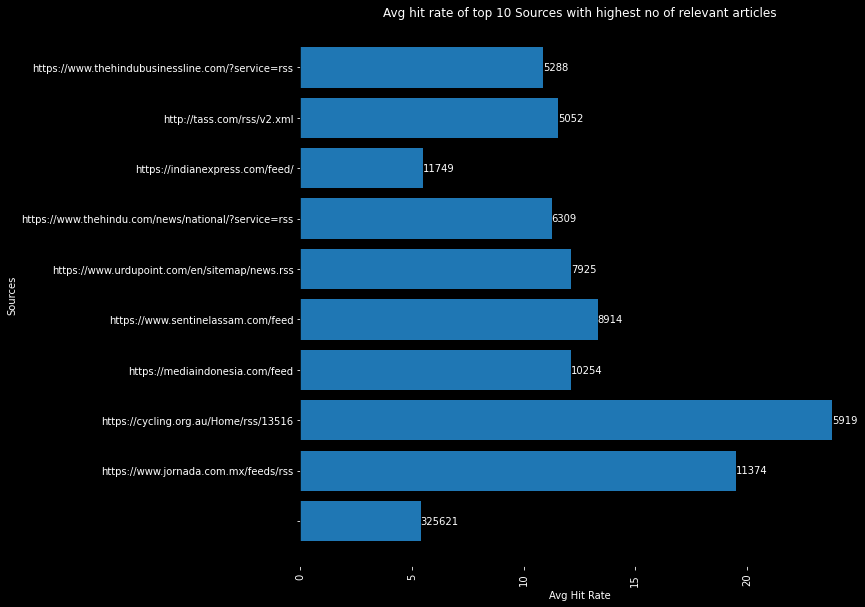

In [23]:
fig, ax = plt.subplots(figsize=(10,10))

hbars=ax.barh(top_articles2["RSS"], top_articles2["Avg_Hit_Rate"])

ax.set_ylabel('Sources',color="white")
ax.set_xlabel('Avg Hit Rate',color="white")

ax.set_title('Avg hit rate of top 10 Sources with highest no of relevant articles',color="white")
ax.bar_label(hbars, labels=top_articles2["Total"],color="white")
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(colors='white', which='both')
plt.xticks(rotation=90)
plt.show()

In [20]:

top_hit_rates=total_articles1[total_articles1["RSS"]!=""].sort_values(by=["Avg_Hit_Rate"],ascending=False).iloc[0:10,]

top_hit_rates["RSS"]=top_hit_rates["RSS"].str.split("?",expand=True)[0]

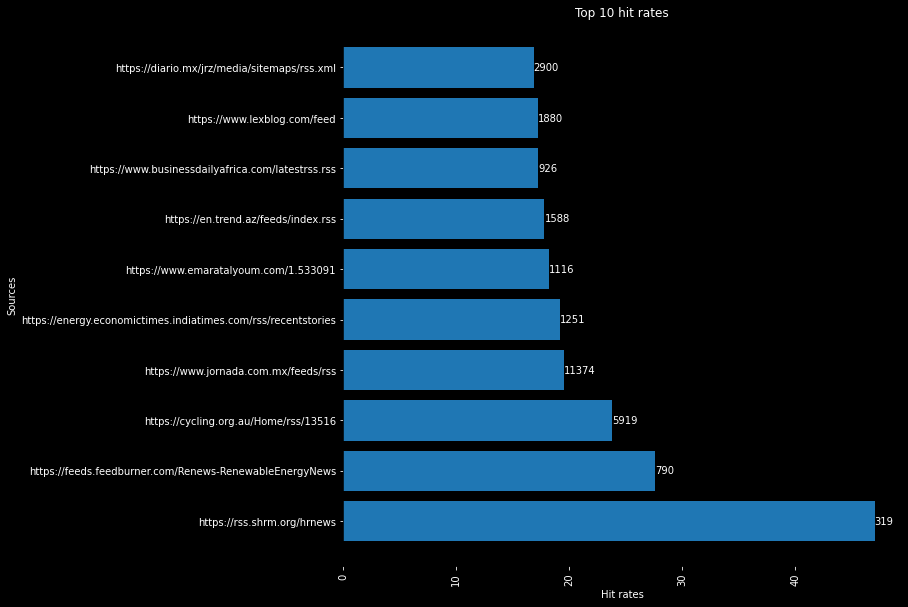

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
hbars=ax.barh(top_hit_rates["RSS"], top_hit_rates["Avg_Hit_Rate"])
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(colors='white', which='both')
ax.bar_label(hbars, labels=top_hit_rates["Total"],color="white")
ax.set_ylabel('Sources',color="white")
ax.set_xlabel("Hit rates",color="white")
ax.set_title('Top 10 hit rates',color="white")
plt.xticks(rotation=90)
plt.show()